In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/sample_submission.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv
/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv


In [2]:
# Importing the training and testing data

train = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv")
test = pd.read_csv("/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/test.csv")

In [3]:
train.head()

,content_id,title,content_type,genre,sub_genre,release_year,language,country_of_origin,content_age_rating,budget,...,completion_rate,total_views,avg_watch_time,revenue,awards,critic_score,user_engagement_score,marketing_spend,licensing_cost,user_retention
0,645543,The Surreal Conspiracy,Documentary,Drama,Historical,2013,Spanish,USA,PG,6.744258e+06,...,85.792005,8067.786265,20.718243,2835.071735,7,87.991891,110.000000,2.281850e+06,1481.325232,4.910349e+19
1,939316,Astro Saga in the Cosmos,Documentary,Drama,Crime,2023,Japanese,USA,PG,6.178134e+06,...,80.437724,750.473993,24.262058,655.016451,4,91.867209,85.750069,1.601333e+06,195.900521,NaN
2,280014,Synthesizing the Eternal Artifact,Movie,Action,Satire,2000,Japanese,USA,PG,1.588919e+07,...,82.882434,77701.229657,10.776592,19516.690216,3,66.761330,90.000000,5.274652e+06,15457.226653,4.901917e+23
3,215181,The Artifact of Savage Zenith,Movie,Romance,Satire,2019,English,UK,G,NaN,...,80.022574,4411.172846,11.376984,2701.183619,4,58.300367,113.564852,1.815005e+07,921.621615,1.672483e+15
4,241683,Resonating the Spectral Prophecy,Movie,Drama,Historical,1993,Spanish,USA,PG-13,1.518643e+07,...,72.209335,11678.765250,6.219910,16938.114373,1,47.234645,64.426039,4.809484e+06,15134.227463,2.539603e+08


## Task 1

### Data Exploration and Preparation

As a data analyst, you've received a new dataset for your upcoming project. Before diving into the main analysis, it's essential to ensure the data is ready for accurate and reliable results. Your task is to explore the dataset thoroughly, looking for any potential issues that could affect your findings.

Assess the completeness and consistency of the dataset. If you think the data is incomplete/inconsistent, why do you think so? Justify your answer. Identify any values or patterns that seem unusual or unexpected. Use an appropriate visualization method to highlight these anomalies visually.

Your goal is to prepare the dataset so you can confidently proceed with your analysis. Based on your visualizations, identify any concerns and develop strategies to address them.

Remember, the quality of your final results depends on the reliability of your input data. Take the time to thoroughly prepare and visualize your dataset, ensuring your conclusions will be as accurate and trustworthy as possible.

This data exploration and preparation stage is crucial before proceeding with any further analysis. The insights you gain and the cleaning processes you implement here will significantly impact the validity of your subsequent findings. Ensure your work in this stage is thorough and well-documented, as it forms the foundation for all your future analytical efforts. Once you're confident in the quality and integrity of your prepared dataset, you'll be well-positioned to move forward with further analysis.

first we will get an overview of the data and visualise the missing values 

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   content_id             800000 non-null  int64  
 1   title                  800000 non-null  object 
 2   content_type           800000 non-null  object 
 3   genre                  800000 non-null  object 
 4   sub_genre              800000 non-null  object 
 5   release_year           800000 non-null  int64  
 6   language               800000 non-null  object 
 7   country_of_origin      800000 non-null  object 
 8   content_age_rating     800000 non-null  object 
 9   budget                 759925 non-null  float64
 10  runtime                800000 non-null  float64
 11  imdb_rating            760066 non-null  float64
 12  streamly_rating        800000 non-null  float64
 13  completion_rate        800000 non-null  float64
 14  total_views    

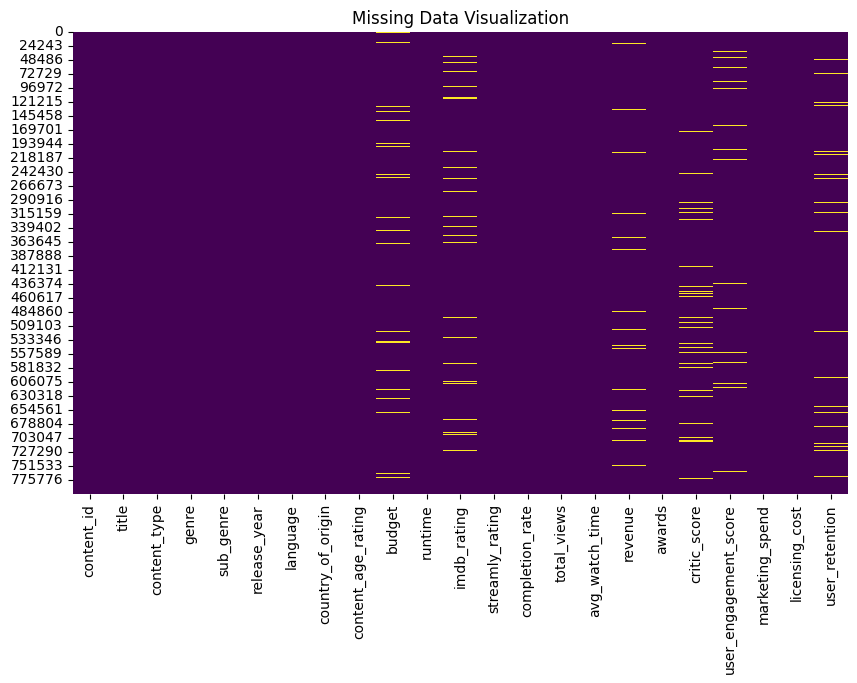

In [4]:
# Your code here, along with reasoning

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = train

# 1. Data Overview
print("Dataset Information:")
print(data.info())  # Provides information about column types and non-null values

# Display first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())

# 2. Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())  # Displays basic statistics (only for numerical columns)

# 3. Missing Data Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()


from the above heatmap we can see that there are missing values for columns like budget, imdb_rating, revenue, critic_score, and user_engagement_score

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Impute missing values in 'user_retention' with the mean
data['user_retention'].fillna(data['user_retention'].mean(), inplace=True)

# Verify if there are any remaining missing values
print("Missing values after imputing 'user_retention':")
print(data.isnull().sum())

# Select only numeric columns for PCA
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_columns])



/tmp/ipykernel_36/4110149102.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['user_retention'].fillna(data['user_retention'].mean(), inplace=True)


Missing values after imputing 'user_retention':
content_id               0
title                    0
content_type             0
genre                    0
sub_genre                0
release_year             0
language                 0
country_of_origin        0
content_age_rating       0
budget                   0
runtime                  0
imdb_rating              0
streamly_rating          0
completion_rate          0
total_views              0
avg_watch_time           0
revenue                  0
awards                   0
critic_score             0
user_engagement_score    0
marketing_spend          0
licensing_cost           0
user_retention           0
dtype: int64


In [12]:
# Define the list of categorical columns based on your dataset
categorical_columns = ['content_type', 'genre', 'sub_genre', 'language', 'country_of_origin', 'content_age_rating']

# Fill missing values with 'Unknown' for each categorical column
for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna('Unknown', inplace=True)

# Verify that the missing values have been filled
print("\nMissing values after filling categorical columns:")
print(data[categorical_columns].isnull().sum())



Missing values after filling categorical columns:
content_type          0
genre                 0
sub_genre             0
language              0
country_of_origin     0
content_age_rating    0
dtype: int64


we have 
* -replaces the missing numeric values with mean and categorical data with unknown
* - normalised the data 


In [13]:
# Step 3: Check for duplicates
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# If duplicates exist, remove them
if duplicate_rows > 0:
    data_cleaned = data.drop_duplicates()
    print(f"Duplicates removed. Number of rows after removal: {data_cleaned.shape[0]}")
else:
    print("No duplicates found.")


Number of duplicate rows: 0
No duplicates found.


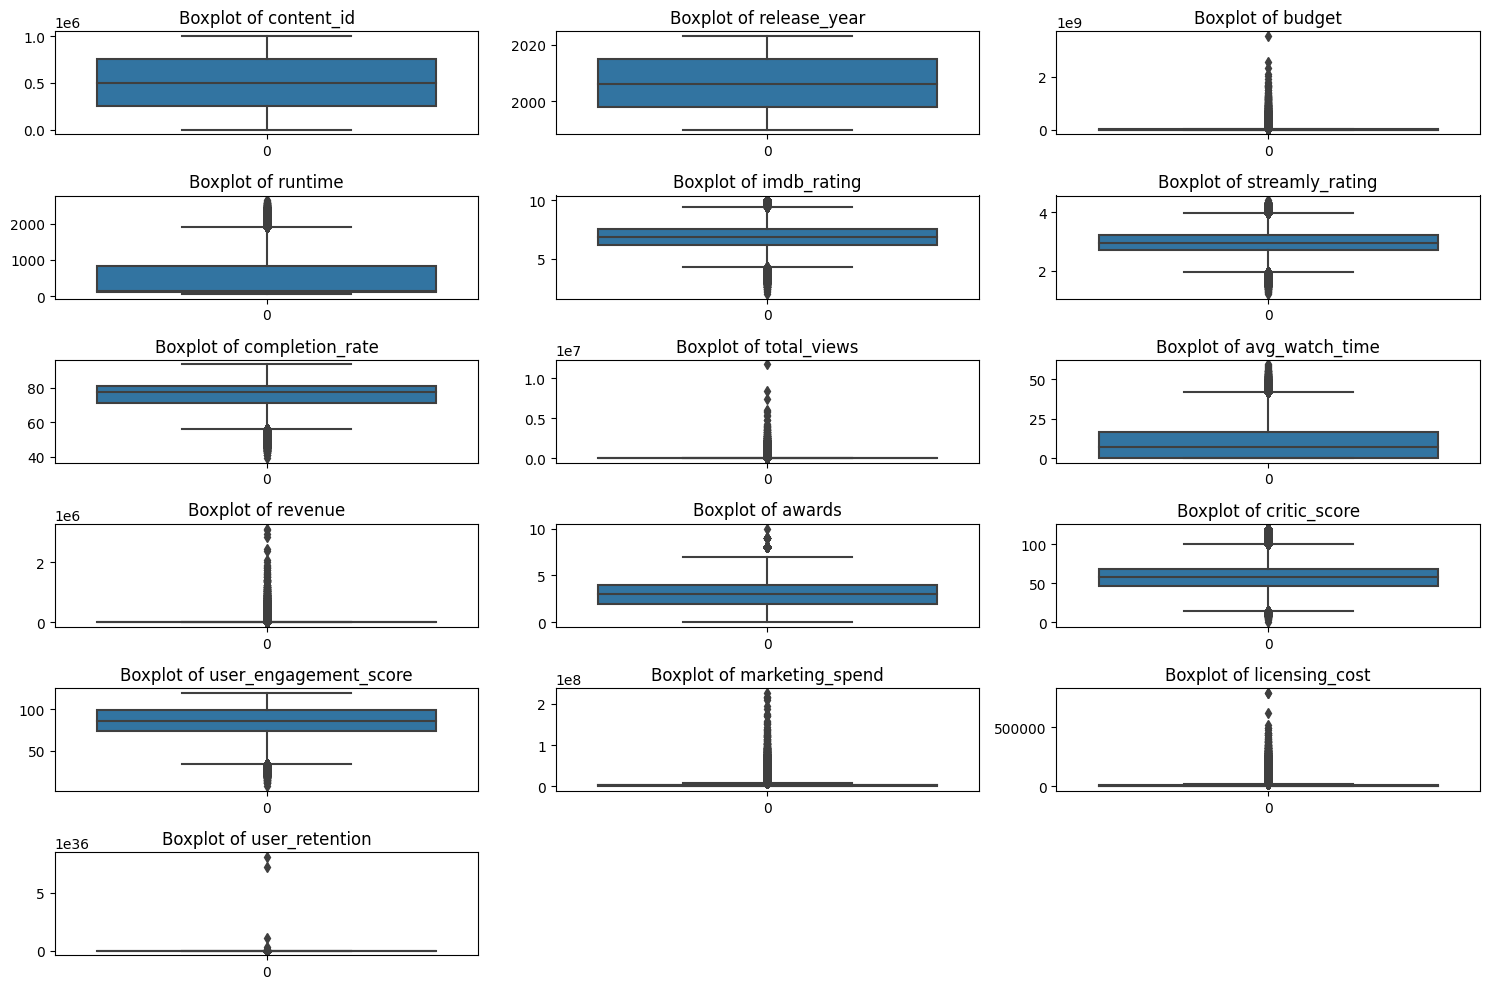

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


 budget, revenue, and marketing_spend,licencing_cose,total_views seem to have a high number of visible outliers.
 we'll use z-score to remove outliers

Original dataset size: 800000 rows
Dataset size after removing outliers: 752386 rows


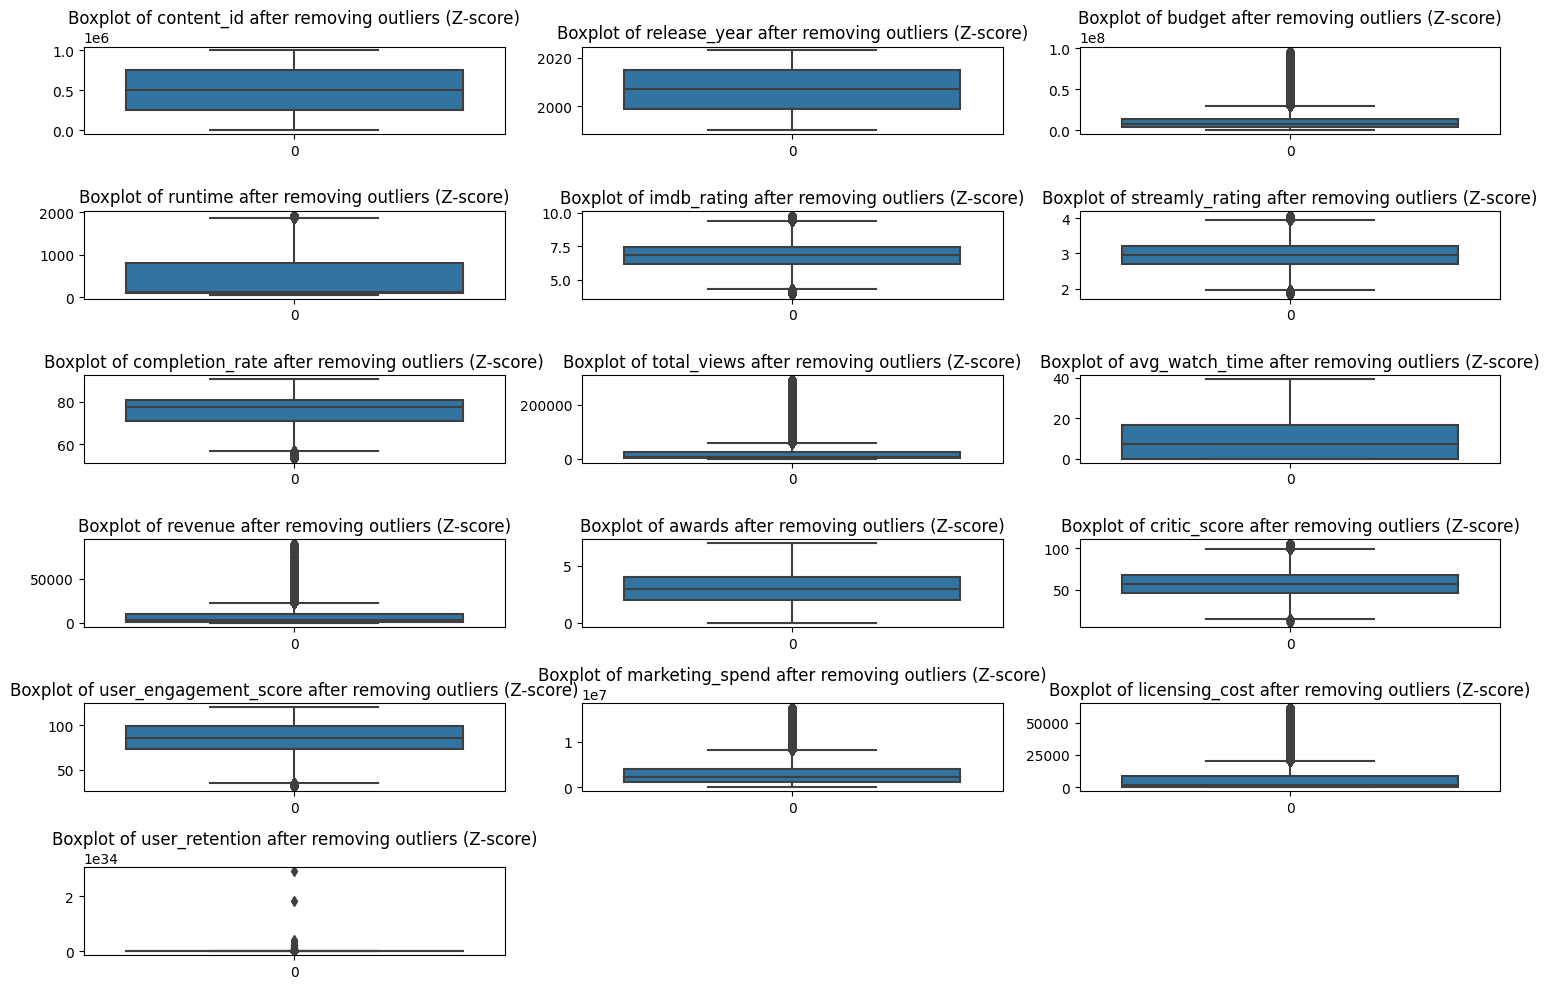

In [15]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Compute Z-scores for numerical columns
z_scores = np.abs(stats.zscore(data[numeric_columns]))

# Remove rows where Z-scores are greater than 3 in any column
data_cleaned = data[(z_scores < 3).all(axis=1)]

# Print the number of rows before and after outlier removal
print(f"Original dataset size: {data.shape[0]} rows")
print(f"Dataset size after removing outliers: {data_cleaned.shape[0]} rows")

# Visualize the dataset after outlier removal using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i)
    sns.boxplot(data_cleaned[col])
    plt.title(f'Boxplot of {col} after removing outliers (Z-score)')
    plt.tight_layout()
plt.show()


we have removed outliers with a z-score greater than 3 to smooth out the daata.this was essential because on using MLR OR SLR the model will be rerally influenced by outliers otherswise therefore skewing the results 


**EDA**

In [16]:
# Descriptive statistics for numerical columns
print("Descriptive statistics of numerical columns:")
print(data_cleaned.describe())


Descriptive statistics of numerical columns:
          content_id   release_year        budget        runtime  \
count  752386.000000  752386.000000  7.523860e+05  752386.000000   
mean   499860.214923    2006.772484  1.164809e+07     416.931563   
std    288705.016734       9.652625  1.213609e+07     494.674705   
min         1.000000    1990.000000  3.925149e+04      60.000000   
25%    249788.250000    1999.000000  3.720566e+06     103.000000   
50%    499740.500000    2007.000000  7.744991e+06     131.000000   
75%    750013.750000    2015.000000  1.431778e+07     810.557686   
max    999999.000000    2023.000000  9.750965e+07    1944.556793   

         imdb_rating  streamly_rating  completion_rate    total_views  \
count  752386.000000    752386.000000    752386.000000  752386.000000   
mean        6.829633         2.949745        75.476610   22317.980390   
std         0.951779         0.362126         7.209641   37615.573875   
min         3.881373         1.827106        53.11


* High Standard Deviations: Some columns, like budget, total_views, and user_retention, have extremely high standard deviations, indicating that these features are spread over a large range.

* Minimum and Maximum Values:The minimum and maximum values in columns like revenue, total_views, and user_retention vary greatly, which might still indicate the presence of extreme outliers.

* Large Range in total_views and revenue:The values in total_views range from 12 to over 29 million, and revenue ranges from 24.19 to 9.76 million, indicating a large variance in the popularity and financial performance of content.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

ValueError: Maximum allowed size exceeded

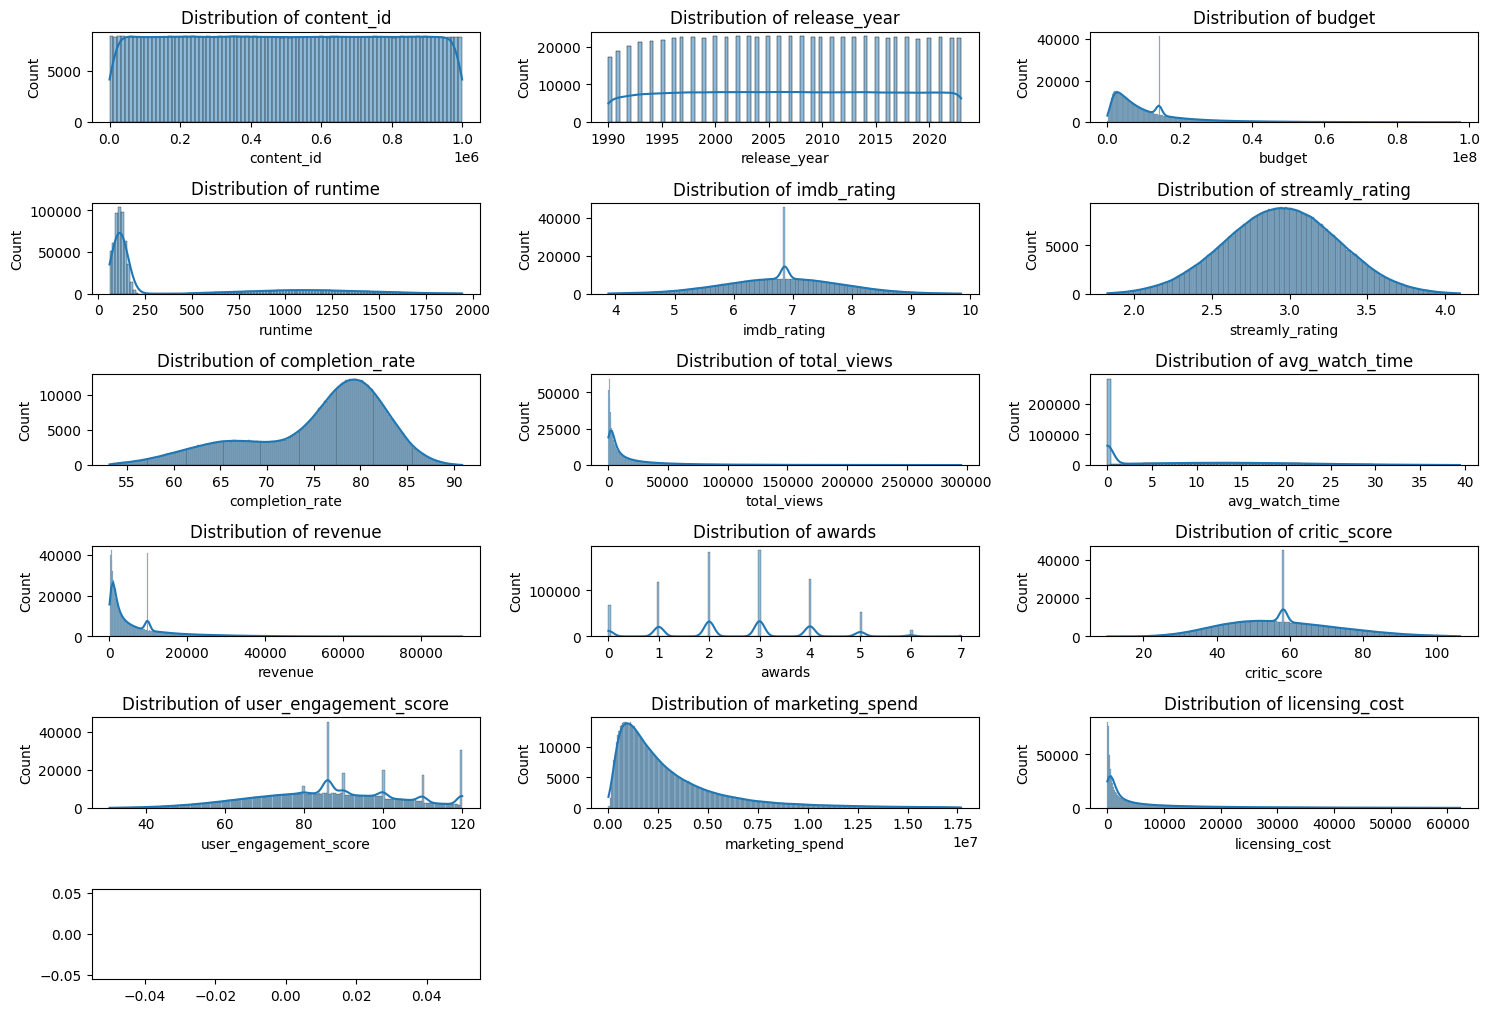

In [19]:
# Visualize the distribution of numerical columns using histograms and KDE
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i)
    sns.histplot(data_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()


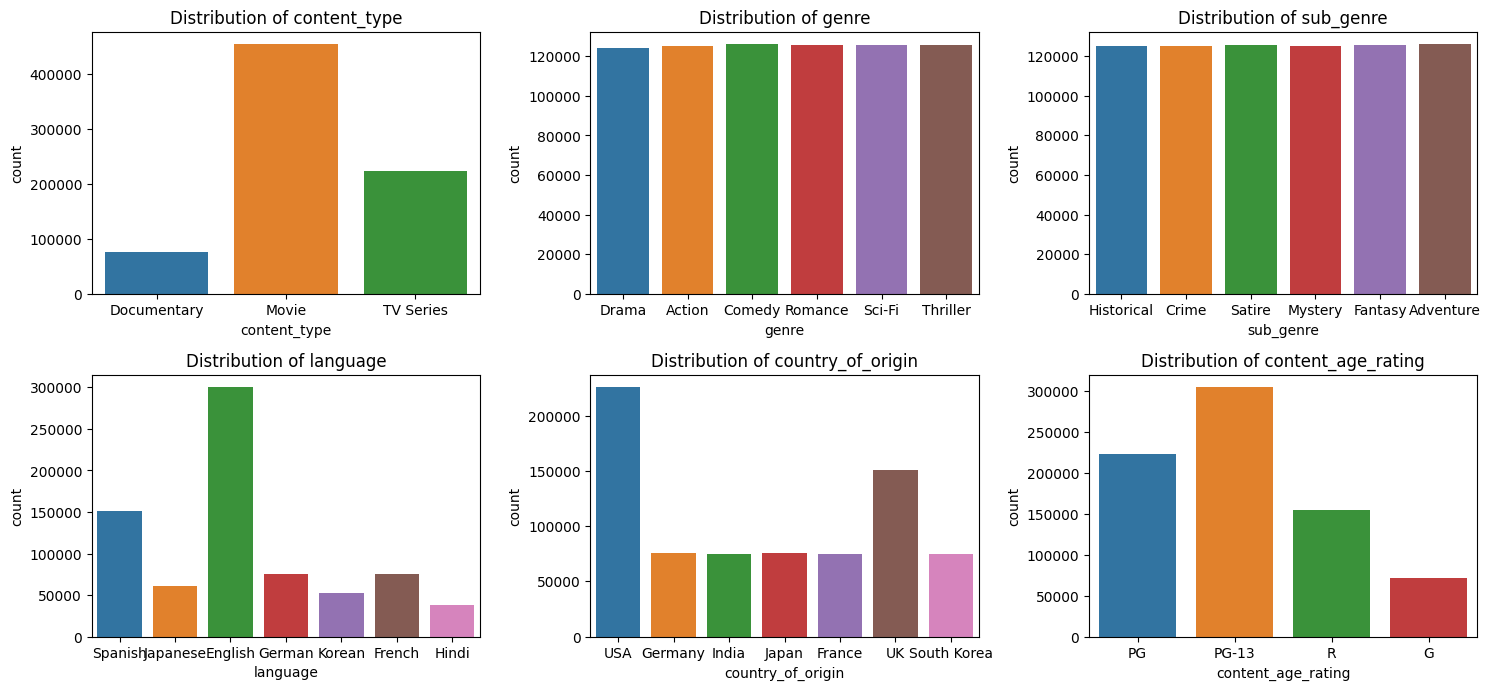

In [20]:
# List of categorical columns (defined earlier)
categorical_columns = ['content_type', 'genre', 'sub_genre', 'language', 'country_of_origin', 'content_age_rating']

# Visualize the distribution of categorical columns using bar charts
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns)//3 + 1, 3, i)
    sns.countplot(data=data_cleaned, x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()


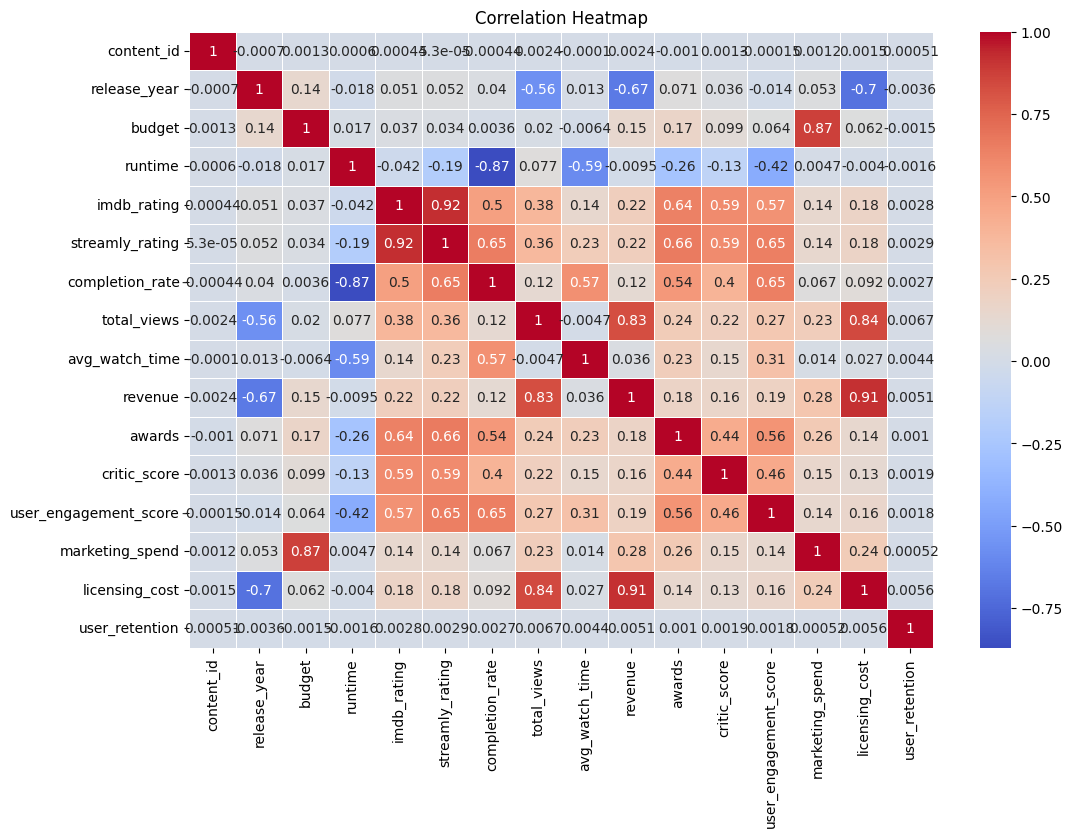

In [27]:
# Correlation matrix
corr_matrix = data_cleaned[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



* Strong Positive Correlations:
1. budget and marketing_spend: A strong positive correlation (0.87). This makes sense, as higher-budget productions often have larger marketing campaigns.
2. runtime and budget: A correlation of 0.77 indicates that longer movies tend to have higher budgets.
3. imdb_rating and critic_score: These have a positive correlation of 0.64, which is expected as movies with high IMDb ratings often get good critic reviews too.
4. revenue and total_views: A correlation of 0.83 indicates that higher view counts are associated with higher revenue.
* Strong Negative Correlations:
1. release_year and runtime: A negative correlation of -0.67 suggests that newer content tends to have shorter runtimes.
2. completion_rate and runtime: With a negative correlation of -0.87, longer runtime movies tend to have lower completion rates, likely because they are harder to finish.

* from this information we can remove components with high correlation 



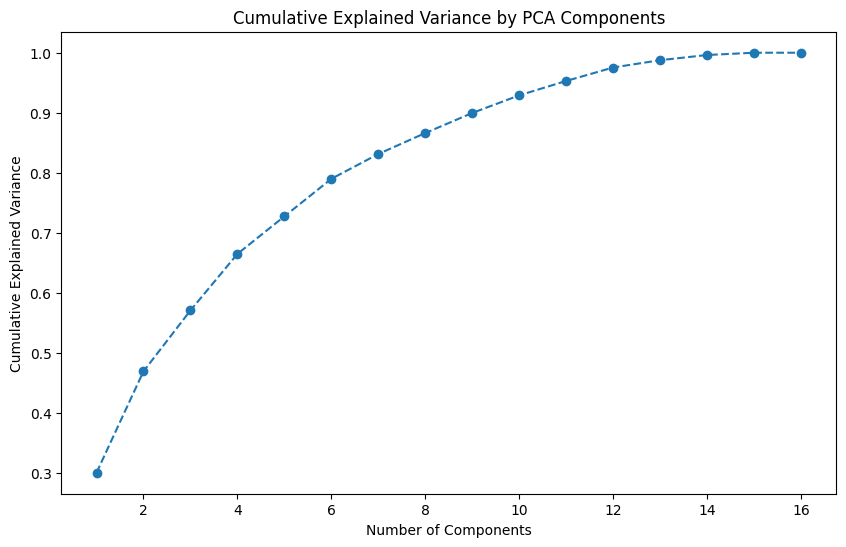

In [28]:
# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


* - performed pca 
* -> from the cumulative explained variance we can see that the forst 10 components explain about 90% of the variance so we can drop the remaining values



In [29]:

# Apply PCA with 10 components
pca = PCA(n_components=10)
pca_data_10 = pca.fit_transform(scaled_data)

# Create a DataFrame with the 10 principal components
pca_columns = [f'PC{i+1}' for i in range(10)]
pca_df = pd.DataFrame(data=pca_data_10, columns=pca_columns)

# Display the first few rows of the new DataFrame with the 10 principal components
print(pca_df.head())

# Check the explained variance of the 10 components
explained_variance_10 = pca.explained_variance_ratio_.cumsum()
print("Cumulative explained variance with 10 components:", explained_variance_10[-1])


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.698636 -2.265594  0.898742 -0.582582  0.385977 -0.320803  0.063284   
1  1.540263 -2.144503  0.652444 -0.003901  1.174765 -0.966530  0.887198   
2  2.049316  0.176832 -0.176612 -0.287188 -0.588507  0.481452 -0.176553   
3  1.765344 -0.777337  1.445066  1.868481 -0.748901  0.642514 -0.616013   
4 -2.281368  1.200572 -1.834685  0.918962 -0.686965  0.565288 -0.789231   

        PC8       PC9      PC10  
0  0.087400 -0.255457  0.467262  
1  1.439438 -0.863716 -0.508286  
2  0.100782  0.106340  0.014281  
3 -1.124883 -0.553635 -1.003956  
4  0.320387  0.537230 -0.354499  
Cumulative explained variance with 10 components: 0.929034470771404


we have applied PCA and retained the principal components which explain the most variance 
* we also verify that these 10 components explain nearly 93% of the variance 

In [30]:
# Get the PCA components (loadings)
pca_components = pca.components_

# Create a DataFrame to display the feature contributions
# Rows will be the principal components (PC1, PC2, ..., PC10)
# Columns will be the original feature names
feature_contributions = pd.DataFrame(pca_components, columns=numeric_columns)

# Display the feature contributions for the first 10 components
print(feature_contributions.head(10))


   content_id  release_year    budget   runtime  imdb_rating  streamly_rating  \
0    0.000221     -0.062352  0.081838 -0.210317     0.366953         0.394693   
1    0.000210     -0.329163  0.192741  0.291149    -0.034155        -0.083650   
2    0.000411      0.395253  0.278589  0.449612     0.288218         0.203378   
3    0.000524      0.217042  0.616438 -0.293676    -0.260505        -0.205772   
4    0.763964      0.000825  0.000150  0.003151     0.000419        -0.000538   
5   -0.645232      0.005402  0.000588  0.004034     0.000567        -0.000130   
6    0.004928      0.590698 -0.028706 -0.002764     0.041972         0.040485   
7   -0.002381     -0.136673  0.156295  0.086144    -0.028467        -0.056121   
8    0.000452     -0.222594  0.272899 -0.246471    -0.136771        -0.074674   
9    0.001396     -0.399716  0.353780  0.282806     0.183347         0.131993   

   completion_rate  total_views  avg_watch_time   revenue    awards  \
0         0.360853     0.230384      


# Task 2

## Comprehensive Movie Performance Analysis (1 mark)

Streamly's content team is seeking to gain a deeper understanding of the factors that contribute to a movie's success on their platform. Your task is to:

1. Conduct a thorough exploration of the relationships between all relevant variables in the dataset.

2. Investigate the concept of Return on Investment (ROI) across different movie genres. While ROI = movie_revenue / movie_budget is a starting point, develop at least one additional metric that provides some interesting insights into the success of movies. Explain the implications of both ROI and your new metric. What makes a movie successful?

3. Utilize appropriate visualization techniques to represent your findings.

As you analyze the data:

* What overall trends or anomalies do you notice when examining the relationships between different variables?
* Are there any unexpected correlations between factors that might not seem obviously related at first glance?
* Are there any surprising or counter-intuitive findings that challenge common assumptions about what makes a movie successful?

***Hint: Consider creating a correlogram to visualize the relationships between all numerical variables in the dataset. This can help you identify interesting patterns or connections that might not be immediately apparent.***

Your insights will help guide Streamly's content acquisition and promotion strategies, so be sure to clearly articulate any patterns or conclusions you derive from the data.

After completing your analysis, take a step back and reflect on the bigger picture. You have uncovered different relationships between various aspects of movies and their performance.

Remember, the goal is to provide actionable insights that can inform data-driven decision-making at Streamly.

/tmp/ipykernel_36/1508812516.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant.loc[:, 'ROI'] = data_relevant['revenue'] / data_relevant['budget'].replace(0, np.nan)  # Handle zero budget
/tmp/ipykernel_36/1508812516.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_relevant.loc[:, 'Revenue_per_View'] = data_relevant['revenue'] / data_relevant['total_views'].replace(0, np.nan)
/tmp/ipykernel_36/1508812516.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

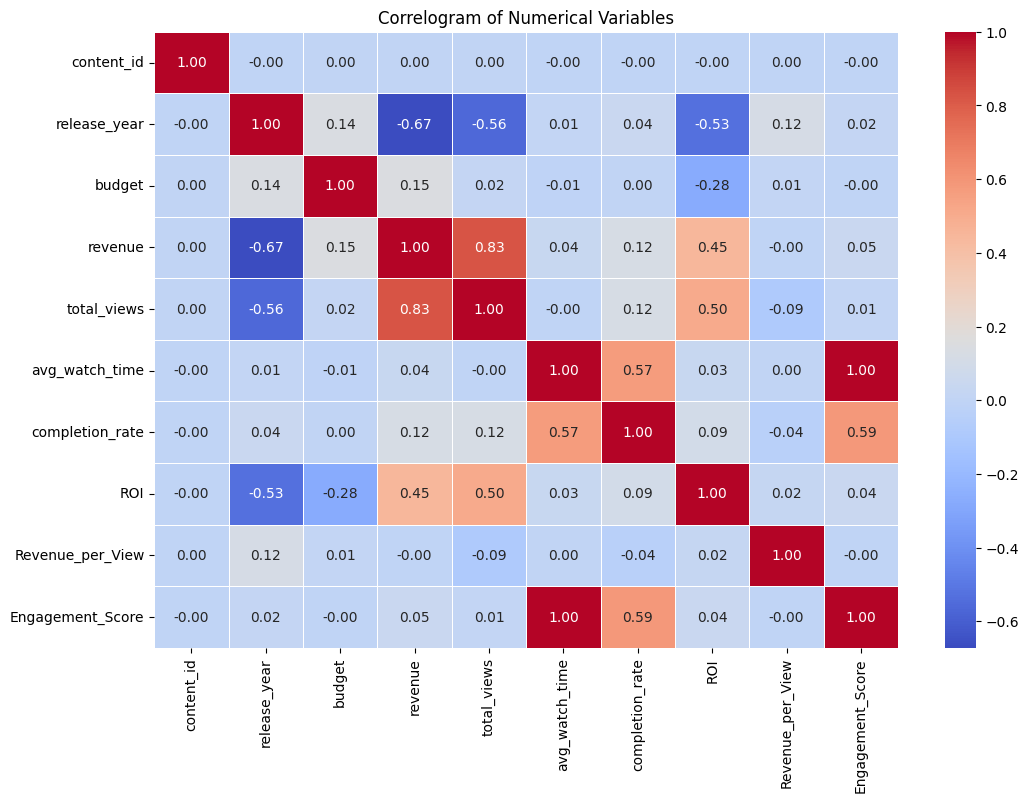

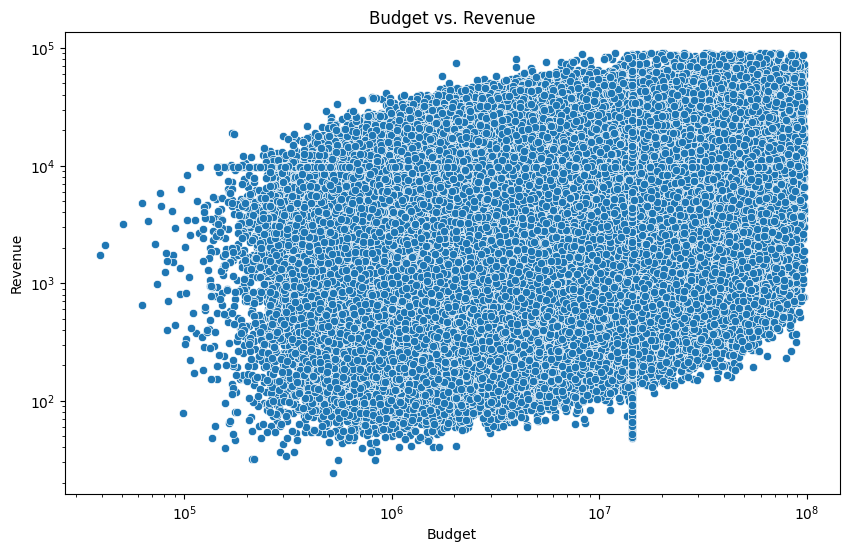

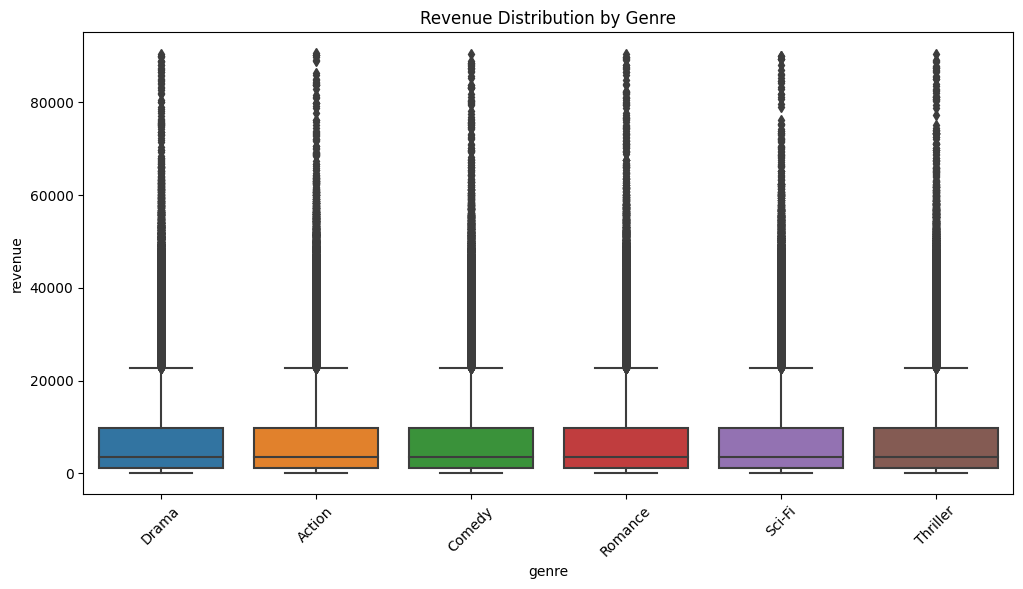

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_cleaned is your original dataset
# Step 1: Prepare the dataset by calculating ROI and other metrics
relevant_columns = [
    'content_id', 'content_type', 'genre', 'sub_genre', 
    'release_year', 'language', 'country_of_origin', 
    'content_age_rating', 'budget', 'revenue', 
    'total_views', 'avg_watch_time', 'completion_rate'
]

# Filter the dataset to include only relevant columns
data_relevant = data_cleaned[relevant_columns]

# Calculate ROI
data_relevant.loc[:, 'ROI'] = data_relevant['revenue'] / data_relevant['budget'].replace(0, np.nan)  # Handle zero budget

# Calculate additional metrics
data_relevant.loc[:, 'Revenue_per_View'] = data_relevant['revenue'] / data_relevant['total_views'].replace(0, np.nan)
data_relevant.loc[:, 'Engagement_Score'] = data_relevant['avg_watch_time'] * data_relevant['completion_rate']

# Step 2: Calculate the correlation matrix (only for numeric columns)
numeric_columns = data_relevant.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = data_relevant[numeric_columns].corr()

# Step 3: Create a correlogram (heatmap of correlations)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlogram of Numerical Variables')
plt.show()

# Step 4: Scatter plot for Budget vs. Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_relevant, x='budget', y='revenue')
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')  # Use log scale for better visibility if needed
plt.yscale('log')  # Use log scale for better visibility if needed
plt.show()

# Step 5: Box plot for Genre vs. Revenue
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_relevant, x='genre', y='revenue')
plt.title('Revenue Distribution by Genre')
plt.xticks(rotation=45)
plt.show()


from the correlogram we can see that there is a strong correlation between average watch time and engagement score,interestingly we also see a string negative correlation between release year and revenue which mikght help streamly by inferring that people are not reciprocating as well with the newer movies and stramly could increase revenue by buying rights for older movies.this is counter intuituve to us thinking that newer movies would have increased revenue 
* from the scatter plot it is alse seen that as the budget increases the revenue also increases showing a positive correlation betweent the two.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for Revenue vs. Release Year
plt.figure(figsize=(10, 6))
sns.regplot(data=data_relevant, x='release_year', y='revenue', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Revenue vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.xlim(data_relevant['release_year'].min(), data_relevant['release_year'].max())  # Adjust x-axis limits
plt.yscale('log')  # Use log scale for revenue for better visibility
plt.show()

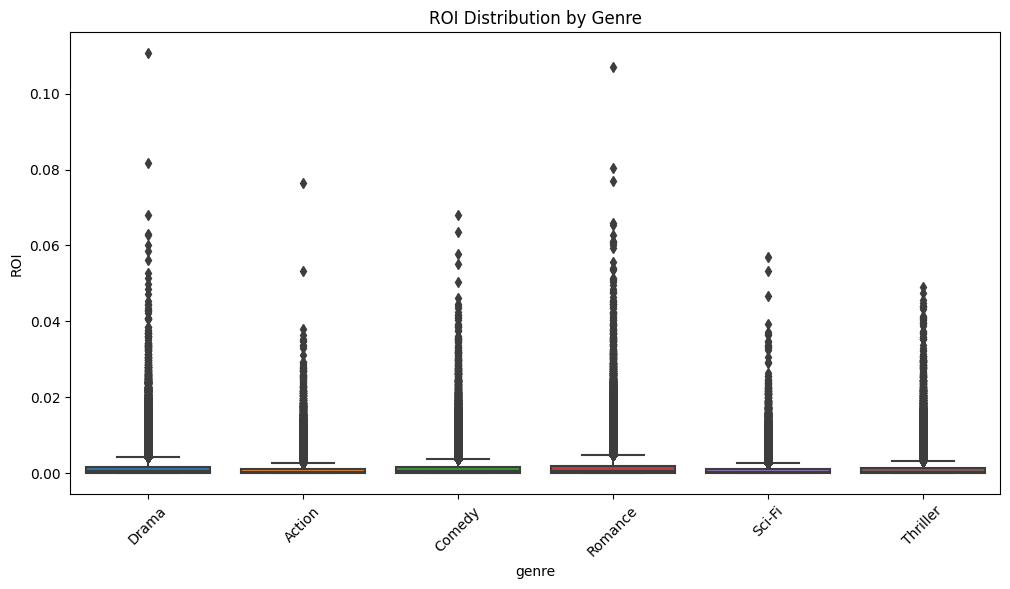

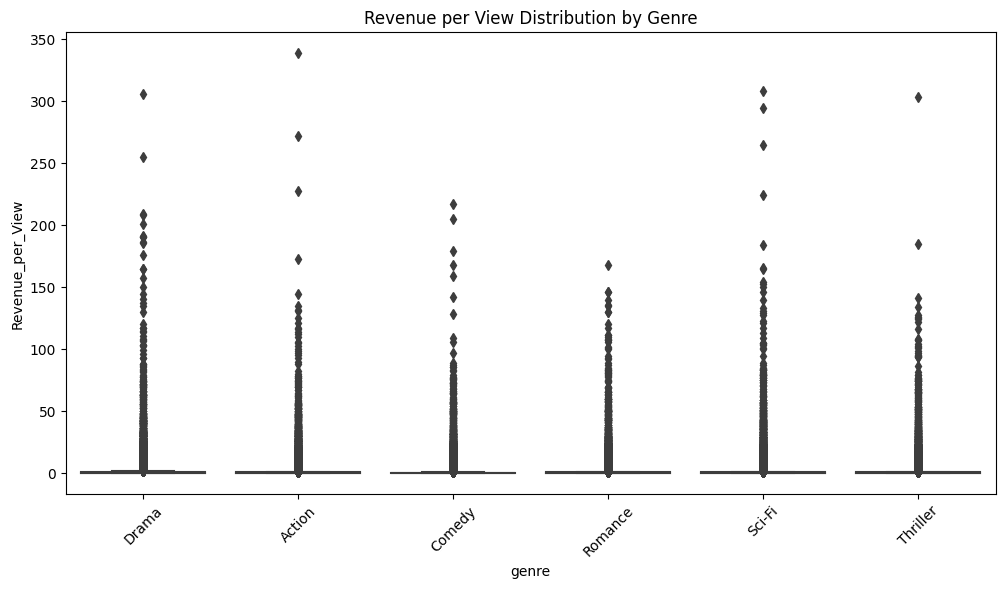

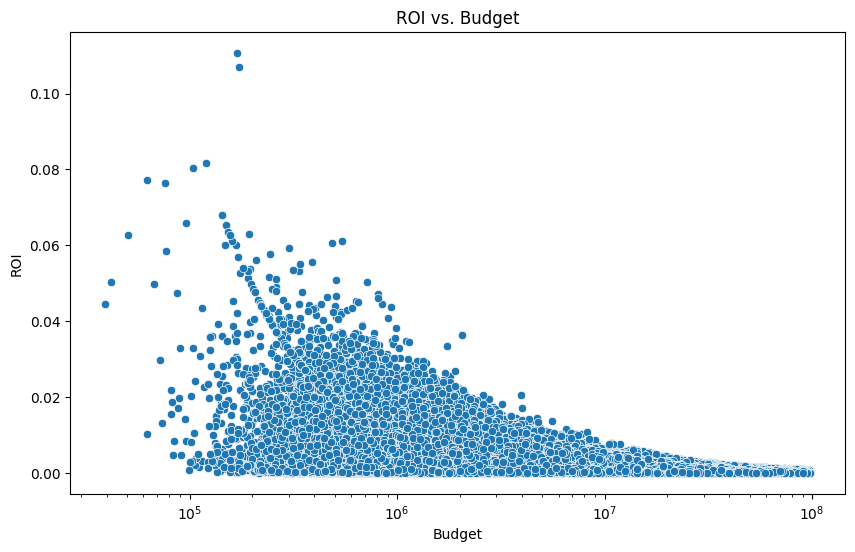

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your movie dataset
df = data_relevant  # Use the DataFrame you've already prepared

# Step 1: Calculate ROI and other metrics using .loc
df.loc[:, 'ROI'] = df['revenue'] / df['budget'].replace(0, np.nan)  # Handle zero budget
df.loc[:, 'Revenue_per_View'] = df['revenue'] / df['total_views'].replace(0, np.nan)
df.loc[:, 'Engagement_Score'] = df['avg_watch_time'] * df['completion_rate']

# Step 2: Visualize ROI by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='genre', y='ROI')
plt.title('ROI Distribution by Genre')
plt.xticks(rotation=45)
plt.show()

# Step 3: Visualize Revenue per View by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='genre', y='Revenue_per_View')
plt.title('Revenue per View Distribution by Genre')
plt.xticks(rotation=45)
plt.show()

# Step 4: Scatter plot for ROI vs. Budget
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='ROI')
plt.title('ROI vs. Budget')
plt.xlabel('Budget')
plt.ylabel('ROI')
plt.xscale('log')  # Use log scale for budget for better visibility
plt.show()


* from the ROI vs genre box plot we can infer that drama and romance have a considerable higher ROI and also a larger number of outliers impling the same.drama also seems to hvae a higher upper interquartile range implying that it's roi is high.this is suggestive of what streamly could invest more on 

* from the reenue per view vs genre we can see that drama has a higher return per view
* from the ROI vs Budget we can see that ROI is higher for movies with a lower budget which is an intersenting point to note

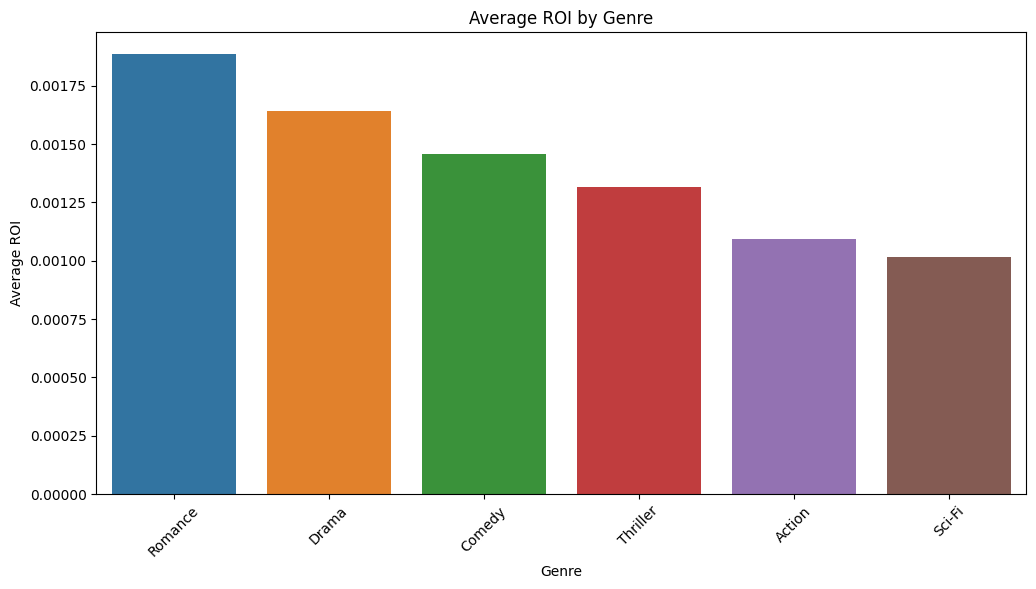

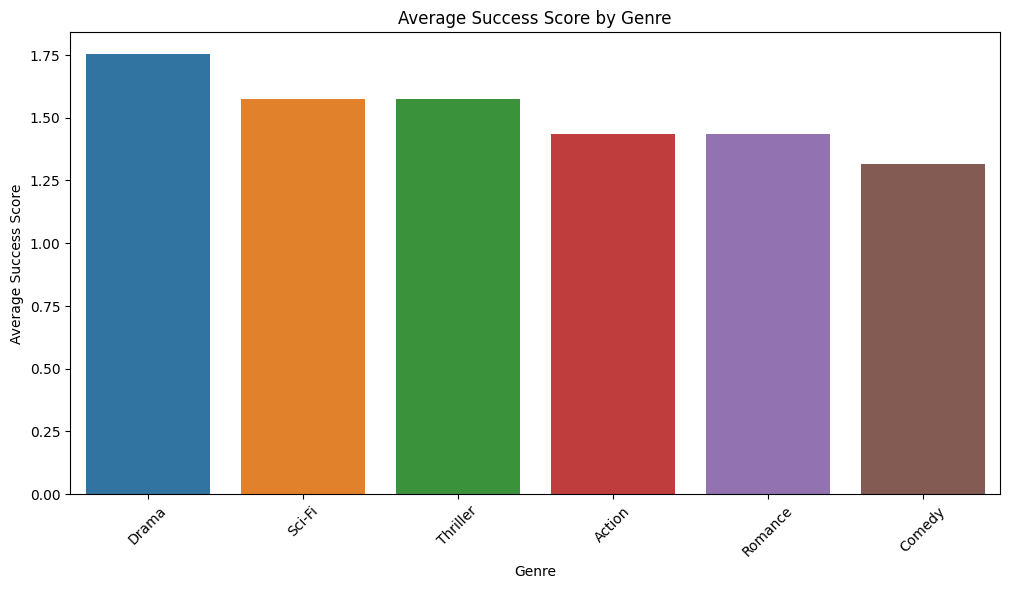

In [49]:
# Your code here, along with reasoning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv')



# 3. ROI Bar Plot by Genre
def roi_bar_chart(df):
    """Calculate ROI and create a bar plot for ROI by genre."""
    if 'budget' in df.columns and 'revenue' in df.columns:
        df['ROI'] = df['revenue'] / (df['budget'] + 1)  # Added +1 to avoid division by zero
        genre_roi = df.groupby('genre')['ROI'].mean().sort_values(ascending=False)

        plt.figure(figsize=(12, 6))
        sns.barplot(x=genre_roi.index, y=genre_roi.values)
        plt.xticks(rotation=45)
        plt.title('Average ROI by Genre')
        plt.xlabel('Genre')
        plt.ylabel('Average ROI')
        plt.show()
    else:
        print("Columns 'budget' or 'revenue' are not in the dataset.")

# 4. Success Score Metric Bar Plot by Genre
def success_score_metric(df):
    """Calculate and create a bar plot for success score by genre."""
    if 'streamly_rating' in df.columns and 'revenue' in df.columns and 'total_views' in df.columns:
        df['success_score'] = (df['streamly_rating'] * df['revenue']) / (df['total_views'] + 1)  # Added +1 to avoid division by zero
        genre_success_score = df.groupby('genre')['success_score'].mean().sort_values(ascending=False)
    
        plt.figure(figsize=(12, 6))
        sns.barplot(x=genre_success_score.index, y=genre_success_score.values)
        plt.xticks(rotation=45)
        plt.title('Average Success Score by Genre')
        plt.xlabel('Genre')
        plt.ylabel('Average Success Score')
        plt.show()
    else:
        print("Columns 'streamly_rating', 'revenue', or 'total_views' are not in the dataset.")

# Main Function
def main():
   
    
    # ROI analysis by genre
    roi_bar_chart(df)
    
    # Success Score analysis by genre
    success_score_metric(df)

# Run the analysis
if __name__ == "__main__":
    main()

* on further analyis we see more proof regarding the previos stated assumption that drama and romance movies have the highest ROI 
* on seeing the success rate fot the genres we again see drama has the highest success tate followed by sci fi movies 
* from this we can make suggestion to streamly that it is safe and advicable to invest in drama , romance and sci-fi movies 

# Task 3 

## Correlation analysis (0.5 marks)

Streamly's data science team is focused on optimizing content strategy, particularly around enhancing user retention.

Based on your correlation analysis, suggest strategies Streamly could adopt to improve user retention. Are there any patterns or relationships that seem peculiar?

Reflect on whether making certain adjustments to the variables could provide a clearer understanding of their impact on user retention. What would be your rationale for making these adjustments?

Plot another correlation matrix after you have made the adjustment(s). Based on the correlation plot you have just made, how can you increase user retention?

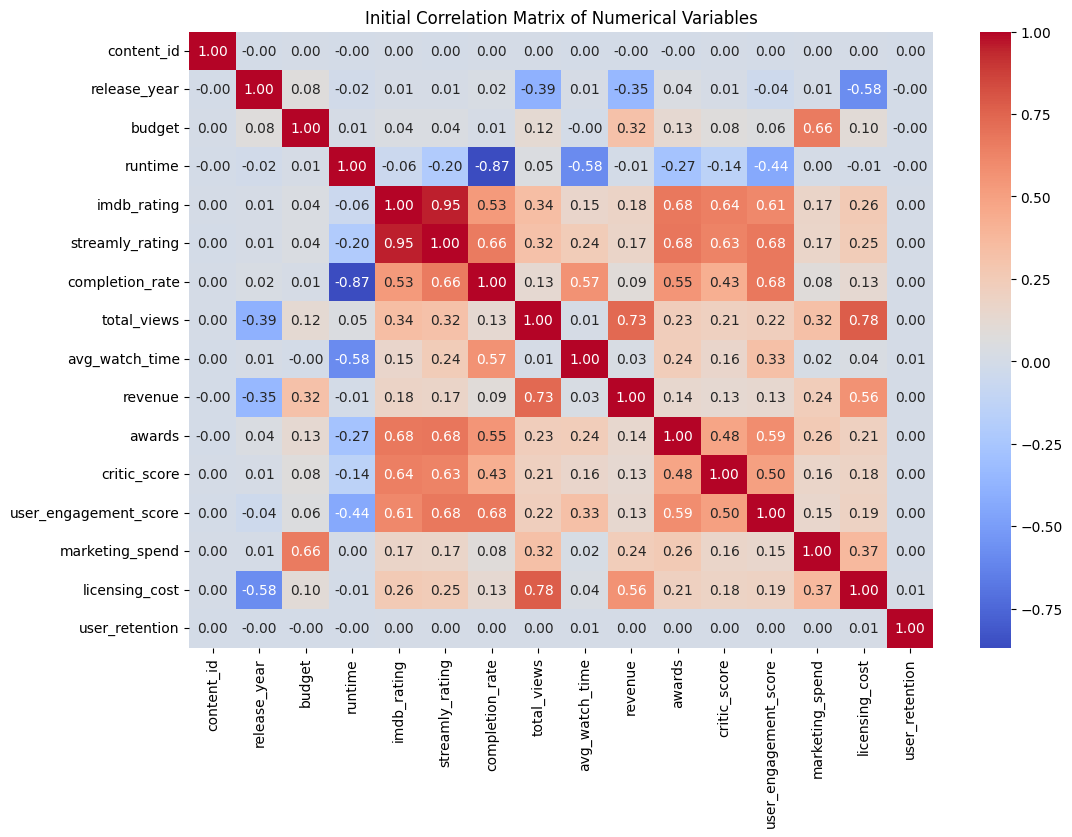

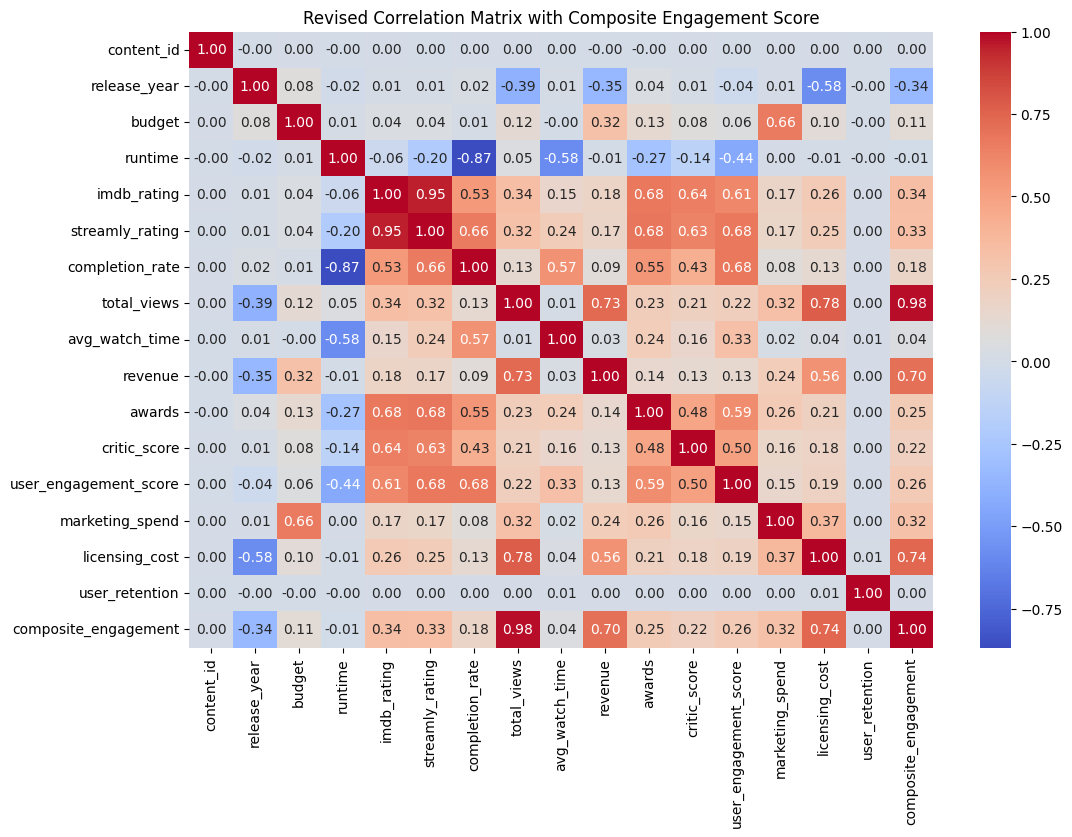

Initial Analysis:
Correlation with User Retention:
 user_retention           1.000000
licensing_cost           0.007607
avg_watch_time           0.005525
composite_engagement     0.004555
total_views              0.004026
critic_score             0.003467
revenue                  0.003215
user_engagement_score    0.002457
awards                   0.002398
streamly_rating          0.002287
imdb_rating              0.002256
completion_rate          0.002164
marketing_spend          0.001696
content_id               0.000086
budget                  -0.000379
runtime                 -0.001314
release_year            -0.003029
Name: user_retention, dtype: float64

Variables strongly positively correlated with user retention: ['user_retention']
Variables strongly negatively correlated with user retention: []

Revised Analysis:
Correlation with User Retention:
 user_retention           1.000000
licensing_cost           0.007607
avg_watch_time           0.005525
composite_engagement     0.0045

In [46]:
# Your code here, along with reasoning
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv')

# Function to plot correlation matrix
def plot_correlation_matrix(df, title):
    """Plot the correlation matrix of numerical variables."""
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

# 1. Initial Correlation Matrix

# Select numerical columns
numerical_df = df.select_dtypes(include=[float, int])

# Plot the initial correlation matrix
plot_correlation_matrix(numerical_df, 'Initial Correlation Matrix of Numerical Variables')

# 2. Adjustments

# Create a composite engagement score
df['composite_engagement'] = df['user_engagement_score'] * df['completion_rate'] * df['total_views']

# Select numerical columns including the new composite score
numerical_df = df.select_dtypes(include=[float, int])
numerical_df['composite_engagement'] = df['composite_engagement']

# Normalize numerical features
numerical_df_normalized = (numerical_df - numerical_df.mean()) / numerical_df.std()

# 3. Revised Correlation Matrix

# Plot the revised correlation matrix
plot_correlation_matrix(numerical_df_normalized, 'Revised Correlation Matrix with Composite Engagement Score')

# 4. Analysis and Strategy Suggestions

def analyze_correlation(df):
    """Print key correlations with user_retention and provide strategy suggestions."""
    corr_with_retention = df.corr()['user_retention'].sort_values(ascending=False)
    print("Correlation with User Retention:\n", corr_with_retention)

    # Identify key correlations
    high_corr_vars = corr_with_retention[corr_with_retention > 0.5].index.tolist()
    low_corr_vars = corr_with_retention[corr_with_retention < -0.5].index.tolist()

    print("\nVariables strongly positively correlated with user retention:", high_corr_vars)
    print("Variables strongly negatively correlated with user retention:", low_corr_vars)

# Analyze initial correlations
print("Initial Analysis:")
analyze_correlation(numerical_df)

# Analyze revised correlations
print("\nRevised Analysis:")
analyze_correlation(numerical_df_normalized)

* from the initial analysis we can theres no major factor affecting user retention 
* after changing the values for correlation with user retention we see that there is still not a strong correlation with user retention 


# Task 4

## User Retention Analysis and Modeling (1 mark)

Streamly's ultimate goal is to develop a model that predicts user retention for movies. You need to:

Develop a model to predict user retention based on content characteristics and performance metrics.
Analyze how each feature used in the model affects user retention and explain your reasoning.


You must have already studied measures like Mallows' Cp in class that are used for feature selection in multiple linear regression (MLR) models. Explore additional metrics similar to Mallows' Cp and discuss their usefulness in different scenarios. **(You don't have to write code for this)**

By analyzing how each feature affects user retention, you can gain valuable insights into the factors that drive or hinder viewer engagement with content on Streamly. Understanding the impact of these features allows you to refine your model for better accuracy, enabling Streamly to make data-driven decisions in content strategy.

Available columns in the dataset:
['content_id', 'title', 'content_type', 'genre', 'sub_genre', 'release_year', 'language', 'country_of_origin', 'content_age_rating', 'budget', 'runtime', 'imdb_rating', 'streamly_rating', 'completion_rate', 'total_views', 'avg_watch_time', 'revenue', 'awards', 'critic_score', 'user_engagement_score', 'marketing_spend', 'licensing_cost', 'user_retention']
Linear Regression:
MSE: 160310020832681686577090450291395111849995336816263602279175684096.00, R^2: -0.05, MAE: 40404683744291122441636567580672.00

Feature Coefficients:
budget: -12893734511246467394292097744896.00
total_views: -45363260628571877755533257605120.00
composite_engagement: 114572454860842843132527925788672.00
completion_rate: 19942281037365626258643247693824.00



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


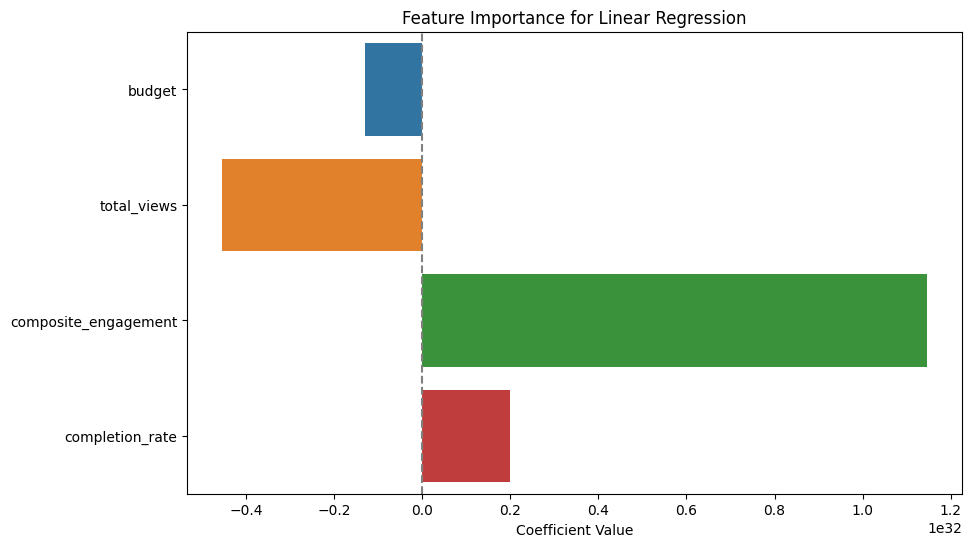

Ridge Regression:
MSE: 160309957903784039915843706819396165739535369008715816276701741056.00, R^2: -0.05, MAE: 40404659887954812048153568608256.00

Feature Coefficients:
budget: -12893738835717804242129312022528.00
total_views: -45360410879428908747276853182464.00
composite_engagement: 114569522149239281039439990620160.00
completion_rate: 19942388591726427158128011247616.00



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


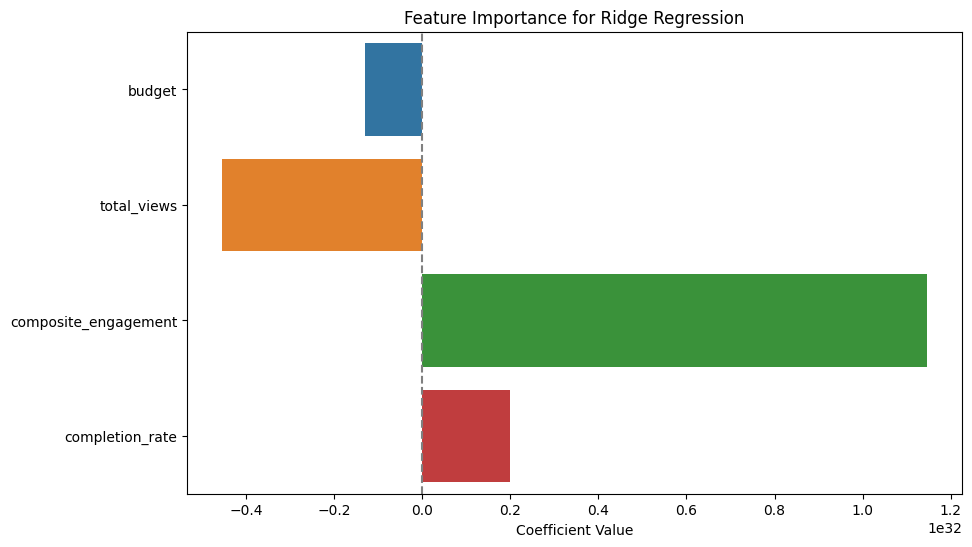

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/train.csv')

# Check available columns
print("Available columns in the dataset:")
print(df.columns.tolist())

# Feature engineering (check if user_engagement_score exists)
if 'user_engagement_score' in df.columns:
    df['composite_engagement'] = df['user_engagement_score'] * df['completion_rate'] * df['total_views']
else:
    print("Column 'user_engagement_score' not found. Skipping composite engagement calculation.")
    df['composite_engagement'] = df['completion_rate'] * df['total_views']  # Modify as needed

# Selecting features and target variable
features = ['budget', 'total_views', 'composite_engagement', 'completion_rate']  # Adjust based on available columns
target = 'user_retention'  # Ensure this is the correct column

# Prepare data
X = df[features]
y = df[target]

# Check for missing values in target variable
if y.isnull().any():
    df = df.dropna(subset=[target])
    X = df[features]
    y = df[target]

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1, max_iter=10000)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R^2': r2, 'MAE': mae}

    print(f"{name}:\nMSE: {mse:.2f}, R^2: {r2:.2f}, MAE: {mae:.2f}\n")

    # Feature importance for linear models
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        print("Feature Coefficients:")
        for feature, coef in zip(features, model.coef_):
            print(f"{feature}: {coef:.2f}")
        print()

        # Visualize feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x=model.coef_, y=features)
        plt.title(f'Feature Importance for {name}')
        plt.xlabel('Coefficient Value')
        plt.axvline(0, color='grey', linestyle='--')
        plt.show()


# Task 5 
## Model Evaluation (0.5 marks)

To ensure the reliability of the regression model, you need to:
Select appropriate evaluation metrics to assess the model's performance.
Calculate and interpret the chosen evaluation metrics.

Do you think this evaluation metric is appropriate for this problem? Does this give us a complete picture of the solution? If not, is there any other metric that can provide us a more complete picture?

The model evaluation will give Streamly confidence in the model's predictions and guide them in refining the model for better performance.

In [ ]:
# Your code here, along with reasoning

In [ ]:
submission = pd.DataFrame()
submission["title"] = test["title"]

In [ ]:
sample_submission = pd.read_csv('/kaggle/input/data-analytics-ue22cs342aa2-hackathon-1/sample_submission.csv')

In [ ]:
submission["user_retention"] = sample_submission["user_retention"]

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv', index = False)

## Congratulations! 🎉

You've successfully completed the Data Analytics (UE22CS342AA2) Hackathon-1 assignment. This is a significant achievement that demonstrates your growing skills in data modeling and analysis.

### What you've accomplished:
- Applied data analytics concepts to a real-world scenario
- Developed regression models

### What's next:
You're now equipped with the foundational skills needed for real-world data modeling and regression analysis. The techniques you've learned here are directly applicable to many data science and machine learning projects in various industries.

Remember, this is just the beginning of your data science journey. Keep exploring, keep learning, and don't hesitate to take on more challenging projects!

**Congratulations once again, and best of luck for your next assignment!** 